In [1]:
from luwiji.neural_network import illustration, demo

# PyTorch was meant to be flexible

Rata - rata workflow kerja dari PyTorch adalah sebagai berikut

- Siapkan dataset dan dataloader
- Bangung Arsitektur nya
- Persiapan training -> MCO
- Training loop

# Sample Data

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split

X = np.random.rand(500, 4)
y = np.random.rand(500, 3)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 4), (100, 4), (400, 3), (100, 3))

# Step 1: Dataset dan Dataloader

Data loader adalah pembuatan minibatch atau batch_size. 

Kalau dataset itu data keseluruhan

In [9]:
import torch
from torch.utils.data import DataLoader, TensorDataset

In [5]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

In [13]:
train_set = TensorDataset(X_train, y_train)
trainloader = DataLoader(train_set, batch_size=32, shuffle=True)

test_set = TensorDataset(X_test, y_test)
testloader = DataLoader(test_set, batch_size=32)

In [12]:
train_set.tensors

(tensor([[0.3088, 0.3884, 0.4718, 0.7978],
         [0.4717, 0.4226, 0.6883, 0.7297],
         [0.6317, 0.6626, 0.1675, 0.4984],
         ...,
         [0.5258, 0.5694, 0.7672, 0.1148],
         [0.4277, 0.5415, 0.5637, 0.7705],
         [0.0450, 0.5445, 0.1259, 0.6524]]), tensor([[0.8834, 0.6245, 0.1883],
         [0.4586, 0.1726, 0.8579],
         [0.8373, 0.4007, 0.5133],
         ...,
         [0.2554, 0.2953, 0.9017],
         [0.5907, 0.0271, 0.4081],
         [0.5205, 0.7139, 0.4200]]))

In [18]:
# iterator = iter(trainloader) # Kalau mau lihat isi nya bisa pakai iter atau for loop, Cara 1

for i, batch in iter(trainloader): # Cara 2
    print(i, batch)

tensor([[0.2498, 0.5939, 0.7367, 0.1198],
        [0.2595, 0.1620, 0.8558, 0.7541],
        [0.9424, 0.4703, 0.5371, 0.3994],
        [0.4921, 0.5167, 0.6781, 0.8446],
        [0.1910, 0.4268, 0.6444, 0.2663],
        [0.9585, 0.9180, 0.9826, 0.0270],
        [0.2478, 0.4254, 0.2785, 0.4074],
        [0.5794, 0.4122, 0.6034, 0.2259],
        [0.1223, 0.5372, 0.5380, 0.7893],
        [0.0782, 0.5571, 0.4659, 0.0867],
        [0.2539, 0.9406, 0.4148, 0.0533],
        [0.8624, 0.8525, 0.7002, 0.1440],
        [0.9757, 0.0858, 0.3151, 0.9782],
        [0.4811, 0.0761, 0.0993, 0.4353],
        [0.7567, 0.8373, 0.8544, 0.4625],
        [0.4149, 0.7782, 0.9751, 0.1791],
        [0.4200, 0.8953, 0.5275, 0.5622],
        [0.7810, 0.2323, 0.7593, 0.6360],
        [0.0698, 0.5556, 0.3577, 0.1130],
        [0.1010, 0.7132, 0.9036, 0.9371],
        [0.1964, 0.9188, 0.9470, 0.6544],
        [0.5103, 0.9146, 0.9655, 0.4025],
        [0.4838, 0.8273, 0.1249, 0.0747],
        [0.5598, 0.4943, 0.5496, 0

In [19]:
# iterator.next()

# Step 2 : Bangun Arsitektur

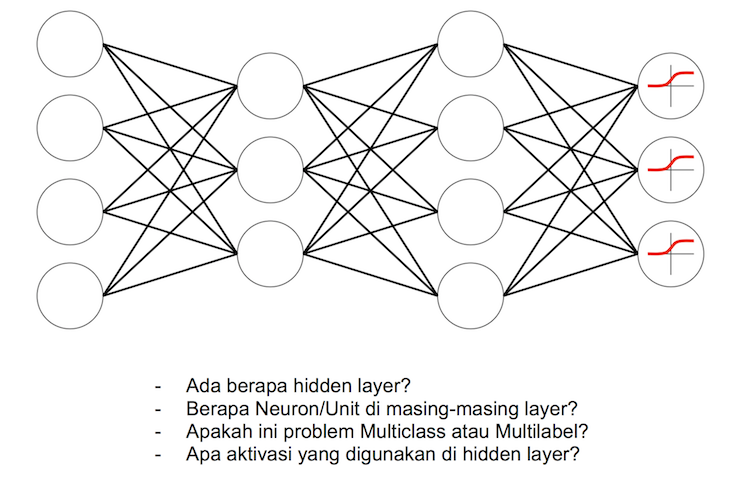

In [20]:
illustration.quiz

Kita build arsitektur nya seperti di atas

In [21]:
from torch import nn

In [22]:
nn.Sequential(
    nn.Linear(4, 3), # Dari 4 layer input ke 3 hidden layer dengan kombinasi Linear
    nn.ReLU(), # Menggunakan aktivasi ReLU
    nn.Linear(3, 4),
    nn.ReLU(),
    nn.Linear(4, 3),
    nn.Sigmoid() # Di output layer memakai Sigmoid Function
)

Sequential(
  (0): Linear(in_features=4, out_features=3, bias=True)
  (1): ReLU()
  (2): Linear(in_features=3, out_features=4, bias=True)
  (3): ReLU()
  (4): Linear(in_features=4, out_features=3, bias=True)
  (5): Sigmoid()
)

# Step 3 : Training Preparation -> MCO

### Model

In [26]:
model = nn.Sequential(
    nn.Linear(4, 3), 
    nn.ReLU(), 
    nn.Linear(3, 4),
    nn.ReLU(),
    nn.Linear(4, 3),
    nn.Sigmoid() 
)

# Bisa pakai Class or Function yang buat sendiri biar gampang


### Criterion 

Fungsi untuk menghitung Loss, jadi tergantung setiap case

In [27]:
criterion = nn.MSELoss() # Model diakhiri Linear -> Untuk Regresi
criterion = nn.NLLLoss() # Model diakhiri logsoftmax -> multiclass clf
criterion = nn.BCELoss() # Model diakhiri sigmoid -> binary clf, multilabel clf

### Optimizer 

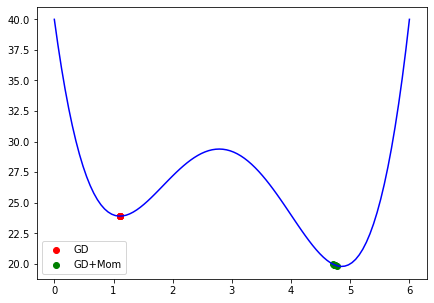

In [28]:
demo.momentum()

Referensi adaptive optimizer lainnya

- https://github.com/Jaewan-Yun/optimizer-visualization
- https://www.deeplearning.ai/ai-notes/optimization/

In [29]:
from torch import optim

In [30]:
optimizer = optim.AdamW(model.parameters(), lr=0.001)

# Step 4 : Training Loop

In [31]:
epochs = 500
for i in range(epochs):
    model.train()
    for feature, target in trainloader:
        output = model(feature) # Feedforward
        loss = criterion(output, target) # Karena mini batch nama nya loss, kalau full namanya cost function
        loss.backward() # Backpropagation

        optimizer.step() # Update Weight
        optimizer.zero_grad() # Reset grad to zero
    
    print(f'\rEpoch: {i+1}/{epochs}', end=' ')

Epoch: 500/500 

In [32]:
epochs = 500
train_cost = []
for i in range(epochs):
    model.train()
    cost = 0
    for feature, target in trainloader:
        output = model(feature) # Feedforward
        loss = criterion(output, target) # Karena mini batch nama nya loss, kalau full namanya cost function
        loss.backward() # Backpropagation

        optimizer.step() # Update Weight
        optimizer.zero_grad() # Reset grad to zero
        
        cost += loss.item() * feature.shape[0]
    train_cost.append(cost / len(train_set)) # Rata - rata loss
    
    print(f'\rEpoch: {i+1:4}/{epochs:4} | train_cost: {train_cost[-1]:.4f}', end=' ')

Epoch:  500/ 500 | train_cost: 0.6889    

In [33]:
import matplotlib.pyplot as plt

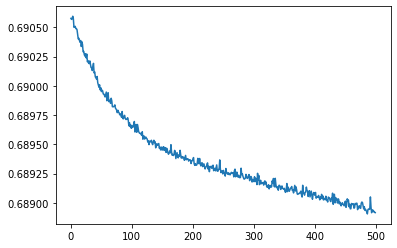

In [34]:
plt.plot(train_cost)